# Ensembles: From Decision Trees to Extra Trees

## Learning Objectives

- Discuss the various types of ensembles methods
- Compare and contrast them and their advatnages/disadvantages
- Apply various ensemble methods, GridSearch, RandomizedSearch to a project dataset.
- Dealing with imbalanced classes

## Questions?
- 

# Ensemble Methods: Overview

> ***Ensemble Methods take advantage of the delphic technique (or "wisdom of crowds") where the average of multiple independent estimates is usually more consistently accurate than the individual estimates.***



> - Bootstrap Aggregation
    - Bagging Classifier
    - Random Forests
- Gradient Boosting:
    - Adaboost
    - Gradient Boosted Trees
- Model Stacking A.K.K. Meta-Ensembling


<!---
<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/Flashcards/Ensemble_Methods_web.png">

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/Flashcards/Avoid_Overfitting_web.png">--->

## Bootstrap Aggregation (Bagging)



The process for training an ensemble through bootstrap aggregation is as follows:

1. Grab a sizable sample from your dataset, with replacement 
2. Train a classifier on this sample  
3. Repeat until all classifiers have been trained on their own sample from the dataset  
4. When making a prediction, have each classifier in the ensemble make a prediction 
5. Aggregate all predictions from all classifiers into a single prediction, using the method of your choice  

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/Flashcards/Bagging_web.png">

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-ensemble-methods-online-ds-ft-100719/master/images/new_bagging.png">

## Random Forests

- Because decision trees are greedy algorithms, every tree given same data would make same conclusions.
- **In addition to bagging**, random forests use **subspace sampling**
<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/Flashcards/Random_Forest_web.png">
<img src="https://raw.githubusercontent.com/learn-co-students/dsc-random-forests-online-ds-ft-100719/master/images/new_rf-diagram.png" width=70%>




### Benefits and drawbacks

Like any algorithm, random forest comes with its own benefits and drawbacks. 

#### Benefits

* **_Strong performance_** Because this is an ensemble algorithm, the model is naturally resistant to noise and variance in the data, and generally tends to perform quite well. 

* **_Interpretability_**:  each tree in the random forest is a **_Glass-Box Model_** (meaning that the model is interpretable, allowing us to see how it arrived at a certain decision), the overall random forest is, as well! 

#### Drawbacks

* **_Computational complexity_**: On large datasets, the runtime can be quite slow compared to other algorithms.

* **_Memory usage_**: Random forests tend to have a larger memory footprint that other models. It's not uncommon to see random forests that were trained on large datasets have memory footprints in the tens, or even hundreds of MB. 


## Boosting / Gradient Boosted Trees

### Weak learners

All the models we've learned so far are **_Strong Learners_** -- models with the goal of doing as well as possible on the classification or regression task they are given. 

The term **_Weak Learner_** refers to simple models that do only slightly better than random chance. 

Boosting algorithms start with a single weak learner (usually trees), but technically, any model will do. 

Boosting works as follows:

1. Train a single weak learner  
2. Figure out which examples the weak learner got wrong  
3. Build another weak learner that focuses on the areas the first weak learner got wrong  
4. Continue this process until a predetermined stopping condition is met, such as until a set number of weak learners have been created, or the model's performance has plateaued  


### Differences between Gradient Boosting and Random Forests

- Independent vs iterative
    - in Random Forests one tree is unaffacted by another.
    - in Boosting mode each tree is iteratively created to address the prior tree's weaknesses.
    
- Weak vs Strong

    - In a random forest, each tree is a strong learner -- they would do just fine as a decision tree on their own.
    - In boosting algorithms, trees are artificially limited to a very shallow depth (usually only 1 split) 
        - to ensure that **each model is only slightly better than random chance**. 

- Aggregate Predictions:
    - in RF each tree votes
    - in boosting models trees are given weight for being good at "hard tasks"
    

### Adaboost & Gradient Boosted Trees


#### Adaboost (Adaptive Boosting)
- **_Key Takeaway:_** Adaboost creates new classifiers by continually influencing the distribution of the data sampled to train each successive learner. 
- Uses subsampling with weighted-probabilities for incorrect predictions to be included in subsequent weak learner

#### Gradient Boosted Trees
- More advanced form - uses gradient descent.
- Trains successive trees on the **residuals**

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-gradient-boosting-and-weak-learners-online-ds-ft-100719/master/images/new_gradient-boosting.png">


## Modeling Stacking / Meta-Ensembling

- Model stacking is when you use the predictions of one model as the input to another model.
<img src="https://burakhimmetoglu.files.wordpress.com/2016/12/workflow.png?w=1140">

# Predicting Prisoner Recidivism with Ensemble Methods

~~To start, we'll build a decision tree classifier, before taking a look at how we can further improve this algorithm by combining multiple decision trees. As we're feeling woodsy, import and inspect the dataset stored in `mushrooms.csv`.~~
    
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-3-final-project-online-ds-ft-021119/master/LSA_map_with_counties_districts_and_B54A5BBCE4156.jpg" width=30%>

- The provided dataset was too easy to predict and I was getting 100% accuracy with vanilla trees.
- Instead using partially-processed version of the Iowa Recidivism Dataset from my Mod 3 Project.
    - https://github.com/jirvingphd/dsc-3-final-project-online-ds-ft-021119
    
- **[Non-Technical Presentation with prior results](https://github.com/jirvingphd/dsc-3-final-project-online-ds-ft-021119/blob/master/Predicting%20Recidivism%20in%20Released%20Prisoner%20in%20Iowa_v2.pdf)**
    


# Plan:

- Vanilla DecisionTreeClassifier
    - RandomizedSearchCV best-params DTC
- Bagging Classifier
- RandomForest
- ExtraTreesClassifier
    - GridSearchCV
- XGBoost

# Activity: Iowa Prisoners (From Last Class)

In [1]:
from IPython.display import clear_output
!pip install -U fsds_100719
clear_output()
from fsds_100719.imports import *
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-notebook')

fsds_1007219  v0.7.20 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [2]:
df = fs.datasets.load_iowa_prisoners(vers='clean',read_csv_kwds={'index_col':0})
df.head()

,yr_released,report_year,race_ethnicity,age_released,crime_class,crime_type,crime_subtype,release_type,super_dist,recidivist,target_pop,sex
0,2010,2013,Black - Non-Hispanic,25-34,C Felony,Violent,Robbery,Parole,7JD,Yes,Yes,Male
1,2010,2013,White - Non-Hispanic,25-34,D Felony,Property,Theft,Discharged – End of Sentence,NaN,Yes,No,Male
2,2010,2013,White - Non-Hispanic,35-44,B Felony,Drug,Trafficking,Parole,5JD,Yes,Yes,Male
3,2010,2013,White - Non-Hispanic,25-34,B Felony,Other,Other Criminal,Parole,6JD,No,Yes,Male
4,2010,2013,Black - Non-Hispanic,35-44,D Felony,Violent,Assault,Discharged – End of Sentence,NaN,Yes,No,Male


In [3]:
## Drop unwanted cols
df= df.drop(columns=['yr_released','report_year'])

### Preprocessing Data

- Null values (fill or drop)
- Data Types (finding categorical variables)
- Inspect the value_counts/labels of categoricals
- Scaling or lack-off
- Encode Them
    - Label Encoding
    - One hot encoding


race_ethnicity      30
age_released         3
crime_class          0
crime_type           0
crime_subtype        0
release_type      1762
super_dist        9581
recidivist           0
target_pop           0
sex                  3
dtype: int64

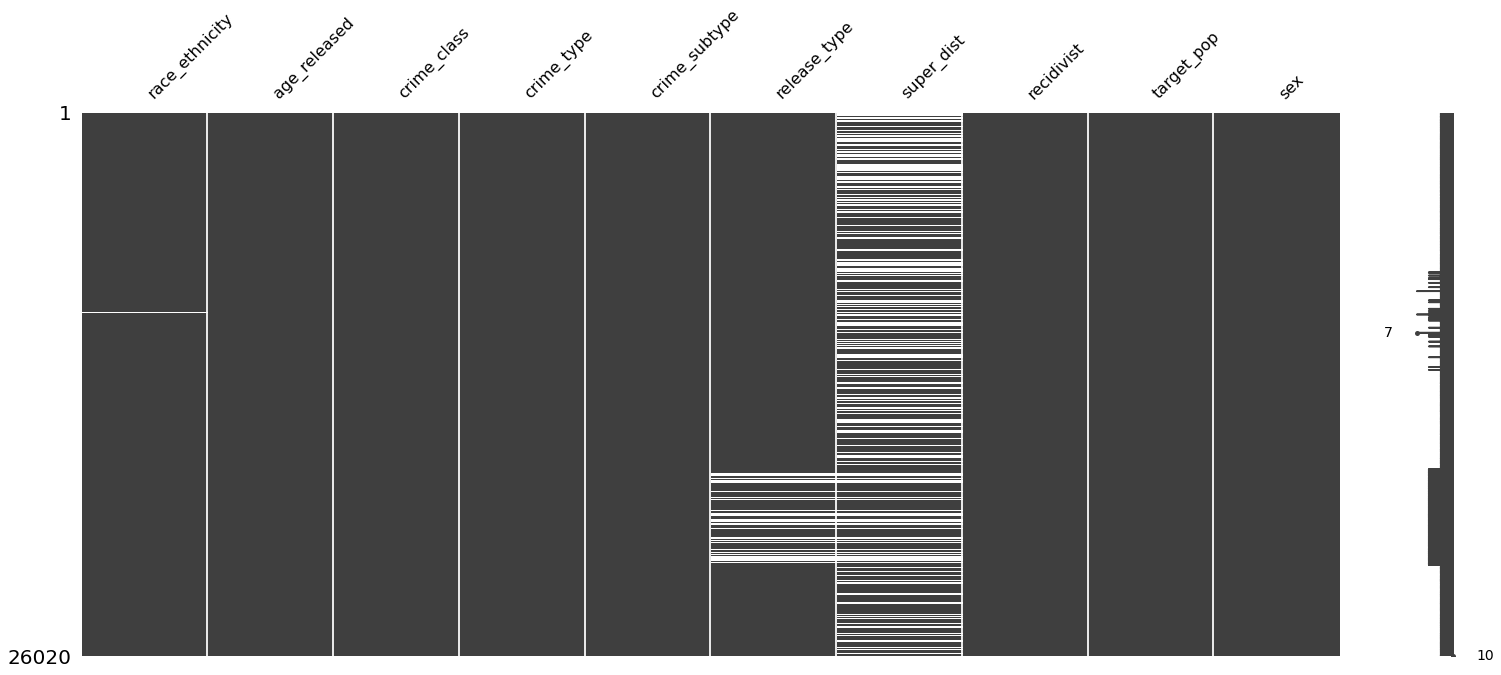

In [4]:
## Check null values
import missingno
missingno.matrix(df)
df.isna().sum()

In [5]:
df.dtypes

race_ethnicity    object
age_released      object
crime_class       object
crime_type        object
crime_subtype     object
release_type      object
super_dist        object
recidivist        object
target_pop        object
sex               object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26020 entries, 0 to 26019
Data columns (total 10 columns):
race_ethnicity    25990 non-null object
age_released      26017 non-null object
crime_class       26020 non-null object
crime_type        26020 non-null object
crime_subtype     26020 non-null object
release_type      24258 non-null object
super_dist        16439 non-null object
recidivist        26020 non-null object
target_pop        26020 non-null object
sex               26017 non-null object
dtypes: object(10)
memory usage: 2.2+ MB


In [7]:
df['race_ethnicity'].value_counts(dropna=False)

White - Non-Hispanic                               17584
Black - Non-Hispanic                                6109
White - Hispanic                                    1522
American Indian or Alaska Native - Non-Hispanic      502
Asian or Pacific Islander - Non-Hispanic             192
Black - Hispanic                                      37
NaN                                                   30
American Indian or Alaska Native - Hispanic           20
White -                                               12
Asian or Pacific Islander - Hispanic                   5
N/A -                                                  5
Black -                                                2
Name: race_ethnicity, dtype: int64

In [8]:
# Defining Dictionary Map for race_ethnicity categories
race_ethnicity_map = {'White - Non-Hispanic':'White',
                        'Black - Non-Hispanic': 'Black',
                        'White - Hispanic' : 'Hispanic',
                        'American Indian or Alaska Native - Non-Hispanic' : 'American Native',
                        'Asian or Pacific Islander - Non-Hispanic' : 'Asian or Pacific Islander',
                        'Black - Hispanic' : 'Black',
                        'American Indian or Alaska Native - Hispanic':'American Native',
                        'White -' : 'White',
                        'Asian or Pacific Islander - Hispanic' : 'Asian or Pacific Islander',
                        'N/A -' : np.nan,
                        'Black -':'Black'}

df['race_ethnicity'] = df['race_ethnicity'].map(race_ethnicity_map)
df['race_ethnicity'].value_counts(dropna=False)

White                        17596
Black                         6148
Hispanic                      1522
American Native                522
Asian or Pacific Islander      197
NaN                             35
Name: race_ethnicity, dtype: int64

In [9]:
df['crime_class'].value_counts()

D Felony                                    10487
C Felony                                     6803
Aggravated Misdemeanor                       4930
B Felony                                     1765
Felony - Enhancement to Original Penalty     1533
Felony - Enhanced                             220
Serious Misdemeanor                           155
Special Sentence 2005                          98
Felony - Mandatory Minimum                     11
Other Felony                                    6
A Felony                                        4
Simple Misdemeanor                              3
Other Felony (Old Code)                         2
Sexual Predator Community Supervision           2
Other Misdemeanor                               1
Name: crime_class, dtype: int64

In [10]:
# Remapping
crime_class_map = {'Other Felony (Old Code)': np.nan ,#or other felony
                  'Other Misdemeanor':np.nan,
                   'Felony - Mandatory Minimum':np.nan, # if minimum then lowest sentence ==  D Felony
                   'Special Sentence 2005': 'Sex Offender',
                   'Other Felony' : np.nan ,
                   'Sexual Predator Community Supervision' : 'Sex Offender',
                   'D Felony': 'D Felony',
                   'C Felony' :'C Felony',
                   'B Felony' : 'B Felony',
                   'A Felony' : 'A Felony',
                   'Aggravated Misdemeanor':'Aggravated Misdemeanor',
                   'Felony - Enhancement to Original Penalty':'Felony - Enhanced',
                   'Felony - Enhanced':'Felony - Enhanced' ,
                   'Serious Misdemeanor':'Serious Misdemeanor',
                   'Simple Misdemeanor':'Simple Misdemeanor'}

df['crime_class'] = df['crime_class'].map(crime_class_map)
df['crime_class'].value_counts(dropna=False)

D Felony                  10487
C Felony                   6803
Aggravated Misdemeanor     4930
B Felony                   1765
Felony - Enhanced          1753
Serious Misdemeanor         155
Sex Offender                100
NaN                          20
A Felony                      4
Simple Misdemeanor            3
Name: crime_class, dtype: int64

In [11]:
df['age_released'].value_counts(dropna=False)

25-34           9554
35-44           6223
Under 25        4590
45-54           4347
55 and Older    1303
NaN                3
Name: age_released, dtype: int64

In [12]:
# Encoding age groups as ordinal
age_ranges = ('Under 25','25-34', '35-44','45-54','55 and Older')
age_codes = (0,1,2,3,4) 
# Zipping into Dictionary to Map onto Column
age_map = dict(zip(age_ranges,age_codes))
age_map

{'Under 25': 0, '25-34': 1, '35-44': 2, '45-54': 3, '55 and Older': 4}

In [13]:
df['age_enc'] = df['age_released'].map(age_map)
df['age_enc'].value_counts()

1.0    9554
2.0    6223
0.0    4590
3.0    4347
4.0    1303
Name: age_enc, dtype: int64

In [14]:
# Mapping age_map onto 'age_released'
# Encoding age groups as ordinal
age_ranges = ('Under 25','25-34', '35-44','45-54','55 and Older')
age_numbers = (20,30,40,50,70) 
age_num_map = dict(zip(age_ranges,age_numbers))
age_num_map

{'Under 25': 20, '25-34': 30, '35-44': 40, '45-54': 50, '55 and Older': 70}

In [15]:
df['age_number'] = df['age_released'].map(age_num_map)
df['age_number'].value_counts()

30.0    9554
40.0    6223
20.0    4590
50.0    4347
70.0    1303
Name: age_number, dtype: int64

In [16]:
## Drop Nulls 
df.isna().sum().divide(len(df))*100
drop_cols  = [col for col in df.drop(columns=['super_dist','release_type']).columns]
drop_cols

['race_ethnicity',
 'age_released',
 'crime_class',
 'crime_type',
 'crime_subtype',
 'recidivist',
 'target_pop',
 'sex',
 'age_enc',
 'age_number']

In [17]:
df.dropna(subset=drop_cols, inplace=True)

In [18]:
df.isna().sum()
df[['super_dist','release_type']] = df[['super_dist','release_type']].fillna('Missing')
df.isna().sum()

race_ethnicity    0
age_released      0
crime_class       0
crime_type        0
crime_subtype     0
release_type      0
super_dist        0
recidivist        0
target_pop        0
sex               0
age_enc           0
age_number        0
dtype: int64

In [19]:
df.dtypes
drop_cols = ['age_released']
df = df.drop(columns=drop_cols)

In [20]:
df.dtypes

race_ethnicity     object
crime_class        object
crime_type         object
crime_subtype      object
release_type       object
super_dist         object
recidivist         object
target_pop         object
sex                object
age_enc           float64
age_number        float64
dtype: object

In [21]:
# one_hot_cols = ['race_ethnicity','crime_class
df = pd.get_dummies(df)#,dummy_na=True)
df.head()

,age_enc,age_number,race_ethnicity_American Native,race_ethnicity_Asian or Pacific Islander,race_ethnicity_Black,race_ethnicity_Hispanic,race_ethnicity_White,crime_class_A Felony,crime_class_Aggravated Misdemeanor,crime_class_B Felony,...,super_dist_8JD,super_dist_ISC,super_dist_Interstate Compact,super_dist_Missing,recidivist_No,recidivist_Yes,target_pop_No,target_pop_Yes,sex_Female,sex_Male
0,1.0,30.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,1.0,30.0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,1,0,0,1
2,2.0,40.0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,1
3,1.0,30.0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,1
4,2.0,40.0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,1


In [22]:
df.drop('recidivist_No',axis=1,inplace=True)

In [23]:
df.head()

,age_enc,age_number,race_ethnicity_American Native,race_ethnicity_Asian or Pacific Islander,race_ethnicity_Black,race_ethnicity_Hispanic,race_ethnicity_White,crime_class_A Felony,crime_class_Aggravated Misdemeanor,crime_class_B Felony,...,super_dist_7JD,super_dist_8JD,super_dist_ISC,super_dist_Interstate Compact,super_dist_Missing,recidivist_Yes,target_pop_No,target_pop_Yes,sex_Female,sex_Male
0,1.0,30.0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
1,1.0,30.0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1,1,0,0,1
2,2.0,40.0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,1
3,1.0,30.0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
4,2.0,40.0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,1


In [24]:
y = df.pop('recidivist_Yes')
df

,age_enc,age_number,race_ethnicity_American Native,race_ethnicity_Asian or Pacific Islander,race_ethnicity_Black,race_ethnicity_Hispanic,race_ethnicity_White,crime_class_A Felony,crime_class_Aggravated Misdemeanor,crime_class_B Felony,...,super_dist_6JD,super_dist_7JD,super_dist_8JD,super_dist_ISC,super_dist_Interstate Compact,super_dist_Missing,target_pop_No,target_pop_Yes,sex_Female,sex_Male
0,1.0,30.0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,1.0,30.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1
2,2.0,40.0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,1.0,30.0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,1
4,2.0,40.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26015,0.0,20.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
26016,2.0,40.0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
26017,1.0,30.0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
26018,1.0,30.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [25]:
from sklearn.model_selection import train_test_split

## Train test split
X_train, X_test, y_train,y_test  = train_test_split(df,y,test_size=.3)

## ADDRESSING IMBALANCED CLASSES

- Downsample/undersampling to match minority class.
- Synthetic Minority Over Sampling Technique (SMOTE)
-  Adaptive Synthetic (ADASYN)
<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/Flashcards/Downsampling_web.png" width=10%>

In [26]:
## Check class
y_train.value_counts(normalize=True)

0    0.666355
1    0.333645
Name: recidivist_Yes, dtype: float64

In [27]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_sample(X_train, y_train)

Using TensorFlow backend.


In [28]:
pd.Series(y_train).value_counts()

1    12111
0    12111
Name: recidivist_Yes, dtype: int64

## Defining the Problem & Fitting a Decision Tree

Now, import the necessary packages and fit a decision tree to predict whether or not a mushroom is poisonous (this is stored under the 'class' feature as 'e' for edible, or 'p' for poisonous.

### Functions from Prior Classes

In [29]:
## Write a fucntion to evalute the model
import sklearn.metrics as metrics

def evaluate_model(y_true, y_pred,X_true,clf):
    
    ## Classification Report / Scores 
    print(metrics.classification_report(y_true,y_pred))

    fig, ax = plt.subplots(figsize=(10,4),ncols=2)
    metrics.plot_confusion_matrix(clf,X_true,y_true,cmap="Greens",
                                  normalize='true',ax=ax[0])
    ax[0].set(title='Confusion Matrix')
    y_score = clf.predict_proba(X_true)[:,1]

    fpr,tpr,thresh = metrics.roc_curve(y_true,y_score)
    # print(f"ROC-area-under-the-curve= {}")
    roc_auc = round(metrics.auc(fpr,tpr),3)
    ax[1].plot(fpr,tpr,color='darkorange',label=f'ROC Curve (AUC={roc_auc})')
    ax[1].plot([0,1],[0,1],ls=':')
    ax[1].legend()
    ax[1].grid()
    ax[1].set(ylabel='True Positive Rate',xlabel='False Positive Rate',
          title='Receiver operating characteristic (ROC) Curve')
    plt.tight_layout()
    plt.show()
    try: 
        df_important = plot_importance(clf)
    except:
        df_important = None
    
#     return df_important

## Vanilla DecisionTree (baseline)

In [30]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=5) # setting max_depth=5 for visualization

In [31]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [32]:
df_import = pd.Series(tree.feature_importances_, index = X_train.columns,name='Importance')
df_import.sort_values()

crime_subtype_Prostitution/Pimping    0.000000
super_dist_5JD                        0.000000
crime_subtype_Other Drug              0.000000
crime_subtype_Other Public Order      0.000000
crime_subtype_Other Violent           0.000000
                                        ...   
target_pop_Yes                        0.048614
age_enc                               0.071592
super_dist_Interstate Compact         0.080188
super_dist_ISC                        0.094668
super_dist_Missing                    0.489954
Name: Importance, Length: 74, dtype: float64

In [33]:
# df_import.sort_values(ascending=True).tail(10).plot(kind='barh',figsize=(12,10))

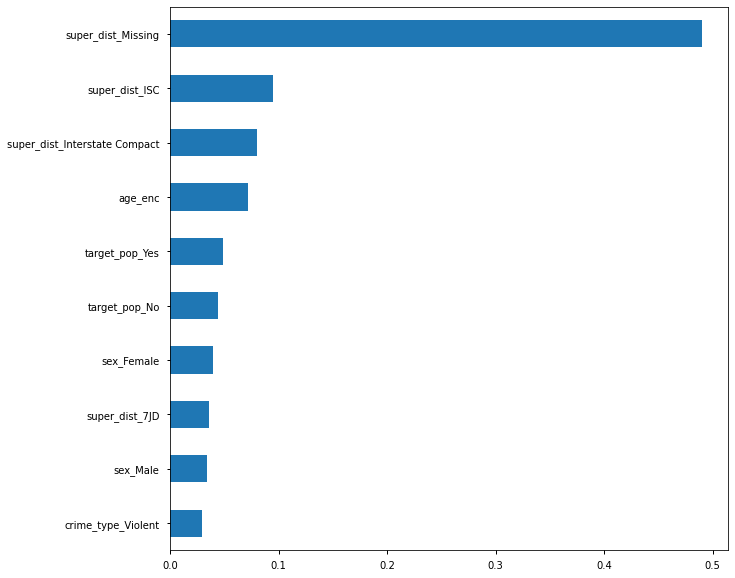

In [34]:
def plot_importance(tree, top_n=10,figsize=(10,10)):
    df_importance = pd.Series(tree.feature_importances_,index=X_train.columns)
    df_importance.sort_values(ascending=True).tail(top_n).plot(
        kind='barh',figsize=figsize)
    return df_importance
plot_importance(tree);

In [35]:
## Write a fucntion to evalute the model
import sklearn.metrics as metrics

def evaluate_model(y_true, y_pred,X_true,clf):
    
    ## Classification Report / Scores 
    print(metrics.classification_report(y_true,y_pred))

    fig, ax = plt.subplots(figsize=(12,6),ncols=2)
    metrics.plot_confusion_matrix(clf,X_true,y_true,cmap="Greens",
                                  normalize='true',ax=ax[0])
    ax[0].set(title='Confusion Matrix')
    y_score = clf.predict_proba(X_true)[:,1]

    fpr,tpr,thresh = metrics.roc_curve(y_true,y_score)
    # print(f"ROC-area-under-the-curve= {}")
    roc_auc = round(metrics.auc(fpr,tpr),3)
    ax[1].plot(fpr,tpr,color='darkorange',label=f'AUC={roc_auc}')
    ax[1].plot([0,1],[0,1],ls=':')
    ax[1].legend()
    ax[1].grid()
    ax[1].set(ylabel='True Positive Rate',xlabel='False Positive Rate',
          title='Receiver operating characteristic (ROC) Curve')
    plt.tight_layout()
    plt.show()
    try: 
        df_important = plot_importance(clf)
    except:
        df_important = None
    

              precision    recall  f1-score   support

           0       0.78      0.54      0.64      5179
           1       0.43      0.69      0.53      2611

    accuracy                           0.59      7790
   macro avg       0.60      0.62      0.58      7790
weighted avg       0.66      0.59      0.60      7790



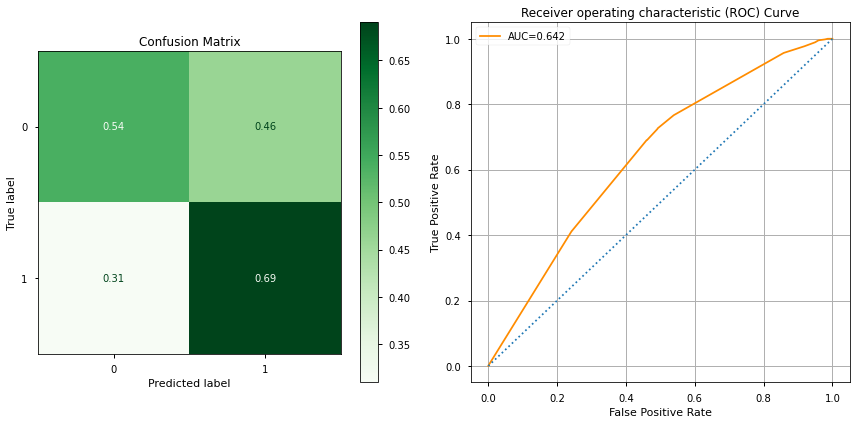

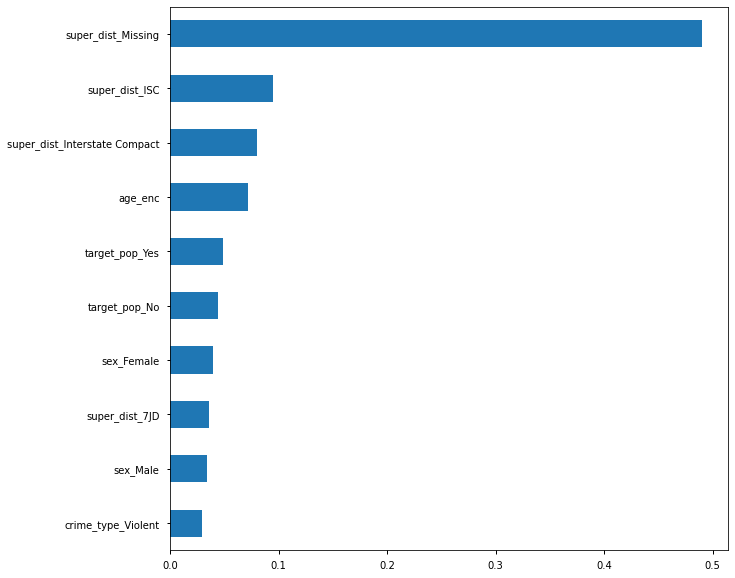

In [36]:
## Get Precitions
y_hat_test = tree.predict(X_test)


#     return df_important
evaluate_model(y_test,y_hat_test,X_test,tree)

In [37]:
## visualize the decision tree
def visualize_tree(tree,feature_names=None,class_names=['0','1'],
                   kws={},save_filename=None,format_='png',save_and_show=False):
    """Visualizes a sklearn tree using sklearn.tree.export_graphviz"""
    from sklearn.tree import export_graphviz
    from IPython.display import SVG
    import graphviz #import Source
    from IPython.display import display
    
    if feature_names is None:
        feature_names=X_train.columns

    tree_viz_kws =  dict(out_file=None,rounded=True, rotate=False, filled = True)
    tree_viz_kws.update(kws)

    # tree.export_graphviz(dt) #if you wish to save the output to a dot file instead
    tree_data=export_graphviz(tree,feature_names=feature_names, 
                                   class_names=class_names,**tree_viz_kws)
    graph = graphviz.Source(tree_data,format=format_)#'png')
    
    if save_filename is not None:
        graph.render(save_filename)
        if save_and_show:
            display(graph)
        else:
            print(f'[i] Tree saved as {save_filename}.{format_}')

#     display(SVG(graph.pipe(format=format_)))#'svg')))

In [38]:
visualize_tree(tree,feature_names=X_train.columns)

# Prisoners Continued..

In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler,LabelEncoder, OneHotEncoder, LabelBinarizer
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,BaggingClassifier

import sklearn.metrics as metrics

## GridSearchCV with DecisionTreeClassifier

- Q: what decisions did we make last time that we want to change? 
    -  
- Q: what columns should we exclude from our analysis?
    -  

## Vanilla DT

In [40]:
## import DTC
from sklearn.tree import DecisionTreeClassifier

## Fit a vanilla DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

              precision    recall  f1-score   support

           0       0.71      0.70      0.71      5179
           1       0.42      0.43      0.43      2611

    accuracy                           0.61      7790
   macro avg       0.57      0.57      0.57      7790
weighted avg       0.61      0.61      0.61      7790



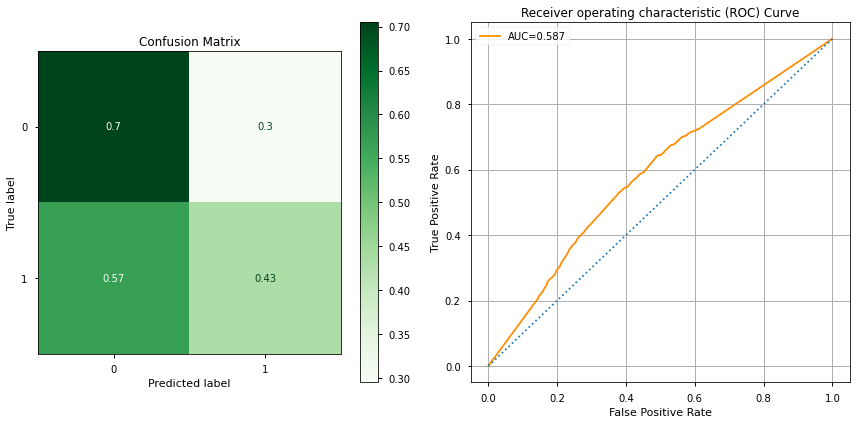

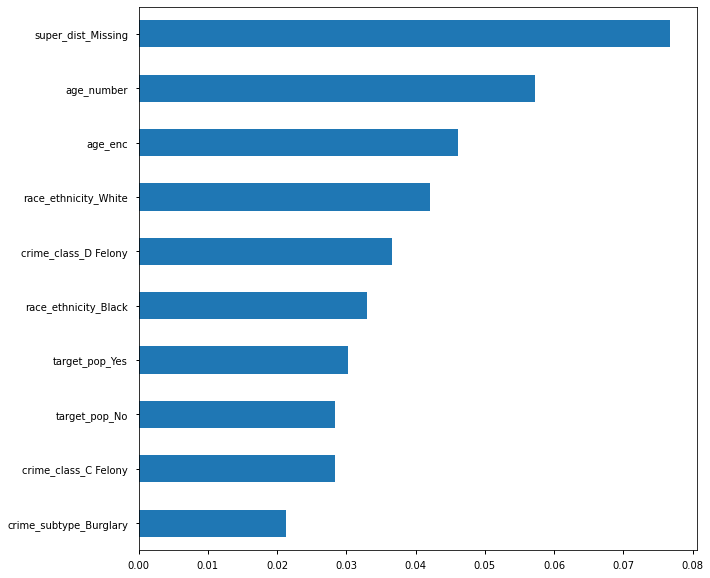

In [41]:
## Get Precitions
y_hat_test = tree.predict(X_test)

## evaluate model
evaluate_model(y_test,y_hat_test,X_test,tree)


In [42]:
## visualize tree
visualize_tree(tree,X_train.columns,save_filename='vanilla_tree')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.111638 to fit


[i] Tree saved as vanilla_tree.png


### Hyperparameters
- Useful to consider to make sure you don't overfit or underfit

Check out the scikit-learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

- `max-depth`
- `min_samples_leaf`: The smallest number of samples that can be in a leaf (node)
- `min_samples_split`: The smallest number of samples in a leaf (node) before splitting it
- `max_features`: Most features to consider when splitting

In [43]:
class Timer():
    def __init__(self, start=True,time_fmt='%m/%d/%y - %T'):
        import tzlocal
        import datetime as dt
        
        self.tz = tzlocal.get_localzone()
        self.fmt= time_fmt
        self._created = dt.datetime.now(tz=self.tz)
        
        if start:
            self.start()
            
    def get_time(self):
        import datetime as dt
        return dt.datetime.now(tz=self.tz)

        
    def start(self,verbose=True):
        self._laps_completed = 0
        self.start = self.get_time()
        if verbose: 
            print(f'[i] Timer started at {self.start.strftime(self.fmt)}')
    
    def stop(self, verbose=True):
        self._laps_completed += 1
        self.end = self.get_time()
        self.elapsed = self.end -  self.start
        if verbose: 
            print(f'[i] Timer stopped at {self.end.strftime(self.fmt)}')
            print(f'  - Total Time: {self.elapsed}')

In [44]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
## Set up param grid
grid = {'max_depth': [3,5,10,15,None],
     'criterion': ['gini','entropy'],
     'min_samples_split':[2,3,4],
     'min_samples_leaf':[1,2,3],
       'max_features': [3,5,10,30,70]}#10,20,50,len(X.columns)]}


## Instantiate classifier
dt_clf = DecisionTreeClassifier()


## Instantiate GridSearchCV
gridsearch = GridSearchCV(dt_clf, param_grid=grid,cv=5)

In [45]:
## Start timer and fit search
timer = Timer()

tree_cv = gridsearch.fit(X_train, y_train)
timer.stop()

## Stop time and print best params
print(tree_cv.best_params_)

[i] Timer started at 04/11/20 - 14:57:00
[i] Timer stopped at 04/11/20 - 14:58:21
  - Total Time: 0:01:20.728660
{'criterion': 'gini', 'max_depth': None, 'max_features': 70, 'min_samples_leaf': 1, 'min_samples_split': 2}


              precision    recall  f1-score   support

           0       0.71      0.71      0.71      5179
           1       0.43      0.43      0.43      2611

    accuracy                           0.62      7790
   macro avg       0.57      0.57      0.57      7790
weighted avg       0.62      0.62      0.62      7790



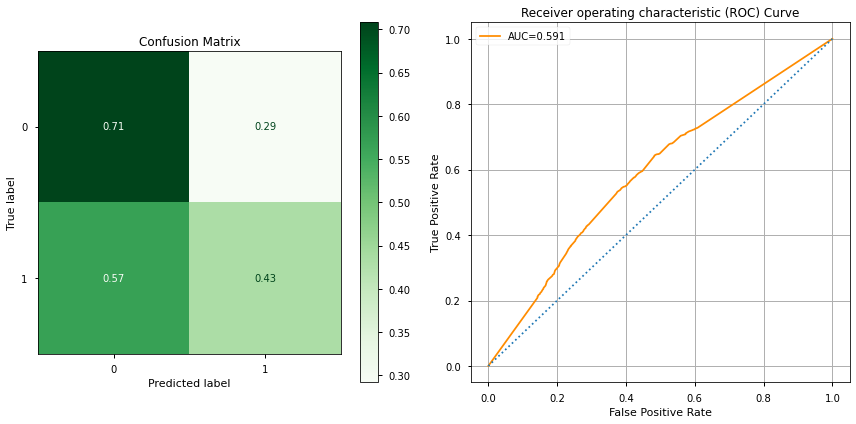

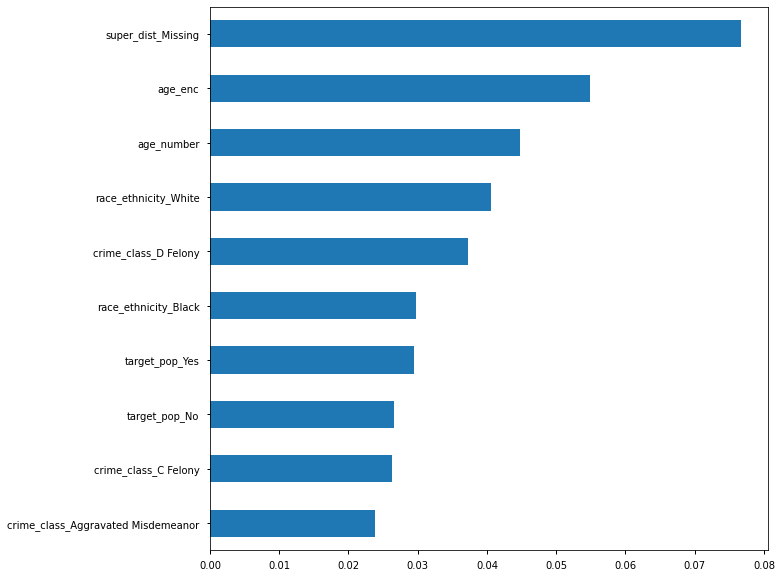

In [46]:
## Create a tree with the gridsearch's best params
tree = DecisionTreeClassifier(**tree_cv.best_params_)
tree.fit(X_train,y_train)

## Get predictions for train and test
y_hat_test = tree.predict(X_test)
y_hat_train = tree.predict(X_train)

evaluate_model(y_test,y_hat_test,X_test,tree)

              precision    recall  f1-score   support

           0       0.71      0.70      0.71      5179
           1       0.43      0.43      0.43      2611

    accuracy                           0.61      7790
   macro avg       0.57      0.57      0.57      7790
weighted avg       0.62      0.61      0.61      7790



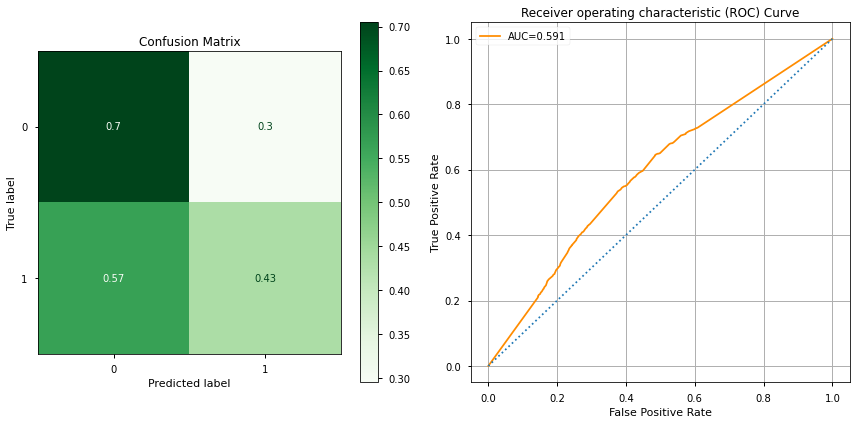

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.108328 to fit


[i] Tree saved as best_tree.png


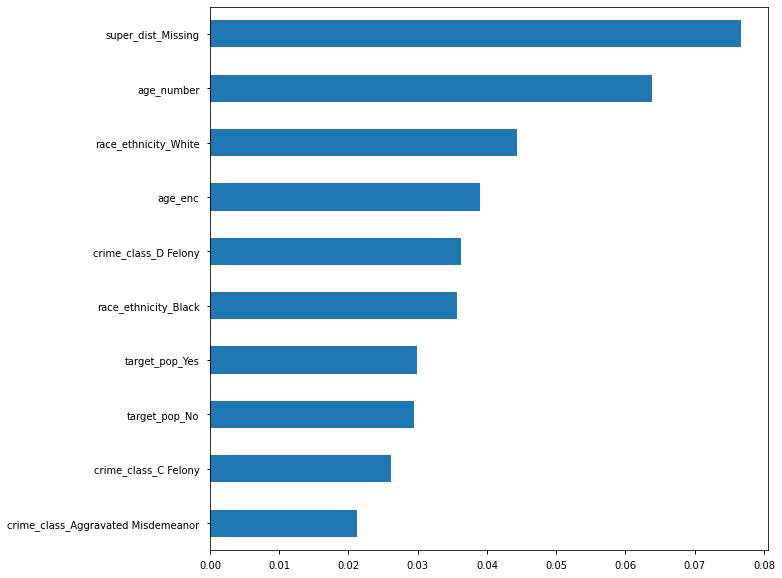

In [47]:
## Can also pull out best model
model = tree_cv.best_estimator_
model.fit(X_train,y_train)
y_hat_test = model.predict(X_test)
evaluate_model(y_test,y_hat_test,X_test,model)
visualize_tree(model,save_filename='best_tree')


### RandomizedSearchCV

In [48]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
## Set up param grid
grid = {'max_depth': [3,5,10,15,None],
     'criterion': ['gini','entropy'],
     'min_samples_split':[2,3,4],
     'min_samples_leaf':[1,2,3],
       'max_features': [3,5,10,30,70]}#10,20,50,len(X.columns)]}


## Instantiate classifier
dt_clf = DecisionTreeClassifier()


## Instantiate GridSearchCV
randomsearch = RandomizedSearchCV(dt_clf, param_distributions=grid,n_iter=100,cv=5)

In [49]:
## Start timer and fit search
timer = Timer()

tree_cv = randomsearch.fit(X_train, y_train)
timer.stop()
## Stop time and print best params
print(tree_cv.best_params_)

[i] Timer started at 04/11/20 - 14:58:55
[i] Timer stopped at 04/11/20 - 14:59:11
  - Total Time: 0:00:15.849157
{'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 70, 'max_depth': None, 'criterion': 'gini'}


              precision    recall  f1-score   support

           0       0.71      0.71      0.71      5179
           1       0.43      0.42      0.42      2611

    accuracy                           0.62      7790
   macro avg       0.57      0.57      0.57      7790
weighted avg       0.61      0.62      0.61      7790



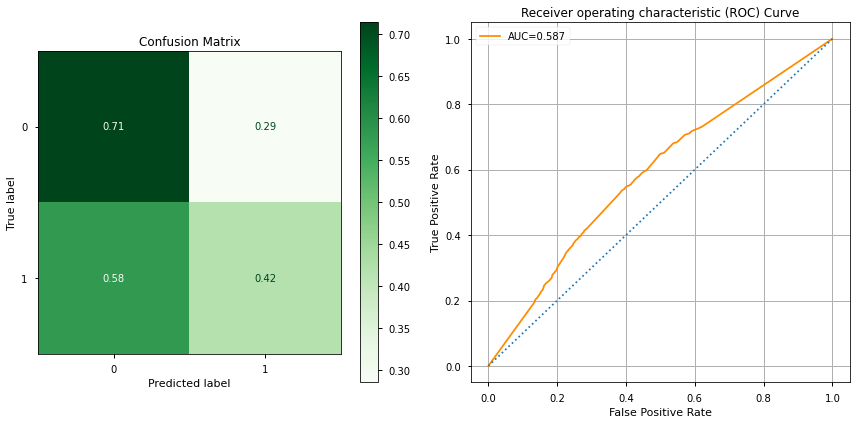

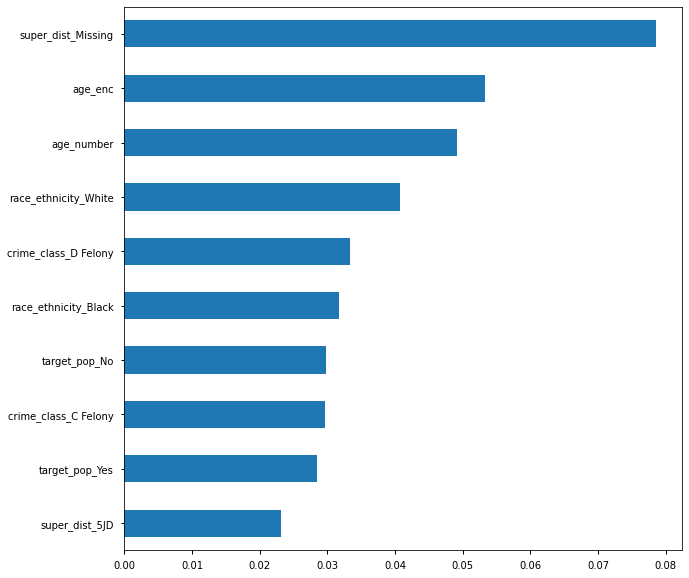

In [50]:
## Create a tree with the gridsearch's best params
tree = DecisionTreeClassifier(**tree_cv.best_params_)
tree.fit(X_train,y_train)

## Get predictions for train and test
y_hat_test = tree.predict(X_test)
evaluate_model(y_test,y_hat_test,X_test,tree)

## Fitting a Set of Bagged Decision Trees

### Bagging Algorithm

- Take a sample of your X_train and fit a decision tree to it. <br/>
- Replace the first batch of data and repeat. <br/>
- When you've got as many trees as you like, make use of all your individual trees' predictions to come up with some holistic prediction. (Most obviously, we could take the average of our predictions, but there are other methods we might try.)

<br/>

- Because we're resampling our data with replacement, we're *bootstrapping*. <br/>
- Because we're making use of our many samples' predictions, we're *aggregating*. <br/>
- Because we're bootstrapping and aggregating all in the same algorithm, we're *bagging*.

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

              precision    recall  f1-score   support

           0       0.72      0.68      0.70      5179
           1       0.43      0.48      0.46      2611

    accuracy                           0.62      7790
   macro avg       0.58      0.58      0.58      7790
weighted avg       0.63      0.62      0.62      7790



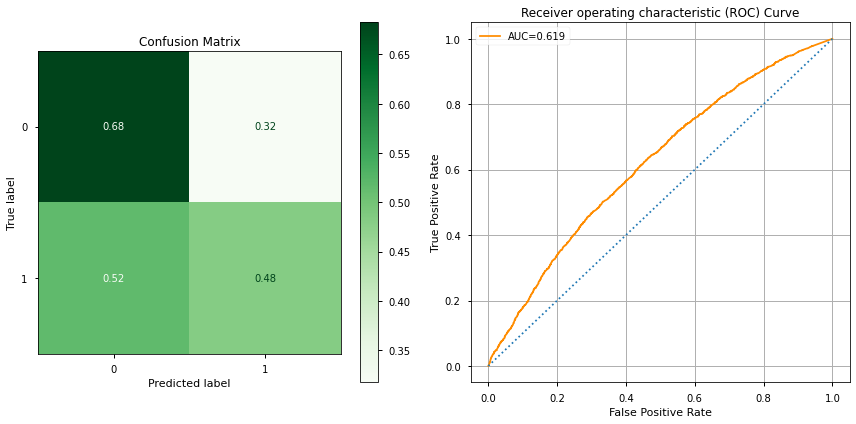

0.6154043645699615


In [52]:
## Import bagging classifier
from sklearn.ensemble import BaggingClassifier

## Fit Classifier and get predictions
bag = BaggingClassifier(n_estimators=100)
bag.fit(X_train, y_train)
y_hat_test = bag.predict(X_test)

## Evaluate Model
evaluate_model(y_test,y_hat_test,X_test,bag)
print(bag.score(X_test, y_test))

That's a significant improvement in accuracy! Let's see if we can do even better.

## Fitting a Random Forest

### Random Forest Algorithm

Let's add an extra layer of randomization: Instead of using *all* the features of my model to optimize a branch at each node, I'll just choose a subset of my features.

0.6182284980744545
              precision    recall  f1-score   support

           0       0.73      0.68      0.70      5179
           1       0.44      0.50      0.47      2611

    accuracy                           0.62      7790
   macro avg       0.58      0.59      0.58      7790
weighted avg       0.63      0.62      0.62      7790



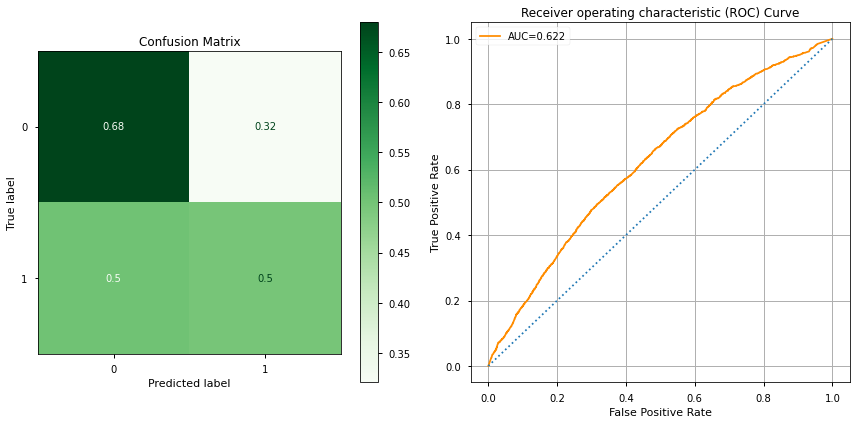

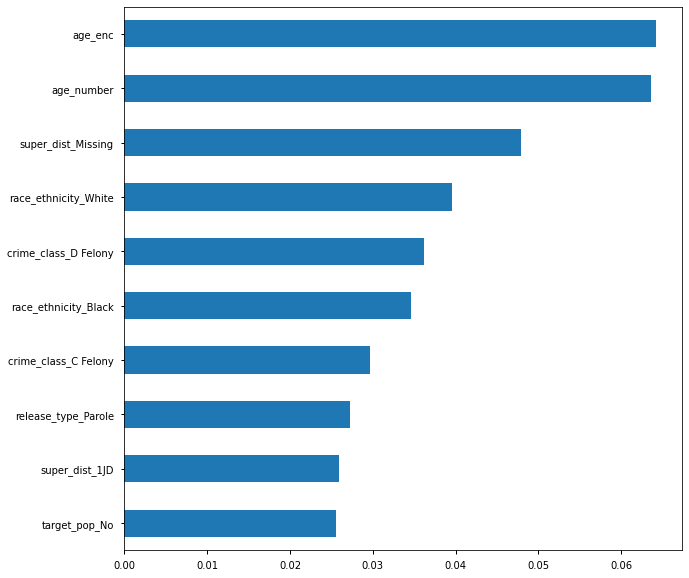

In [53]:
## Import Random Forest
from sklearn.ensemble import RandomForestClassifier

## Fit Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))

## Get predictions and evaluate model
y_hat_test = rf.predict(X_test)
evaluate_model(y_test,y_hat_test,X_test,rf)

## Fitting a Stand of Extremely Randomized Trees

### Extra Trees Algorithm

Sometimes we might want even one more bit of randomization. Instead of always choosing the *optimal* branching path, we might just choose a branching path at random. If we're doing that, then we've got extremely randomized trees.

In [54]:
## Import and fit an ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_estimators=100)
et.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [55]:
et.score(X_test, y_test)

0.6202824133504493

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      5179
           1       0.43      0.43      0.43      2611

    accuracy                           0.62      7790
   macro avg       0.57      0.57      0.57      7790
weighted avg       0.62      0.62      0.62      7790



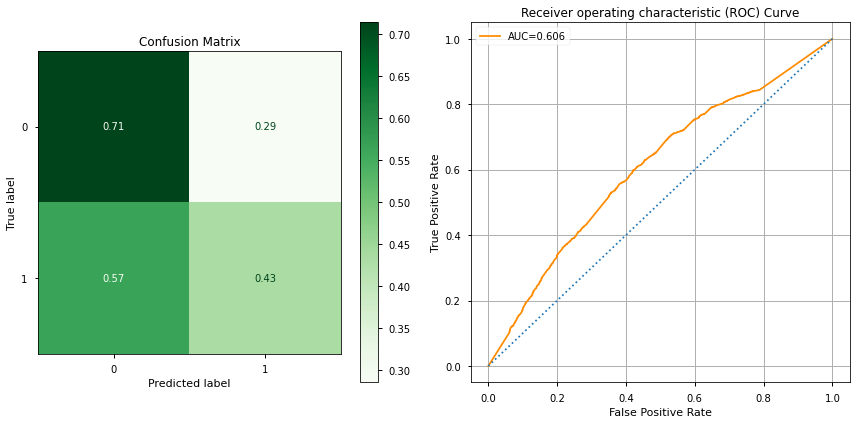

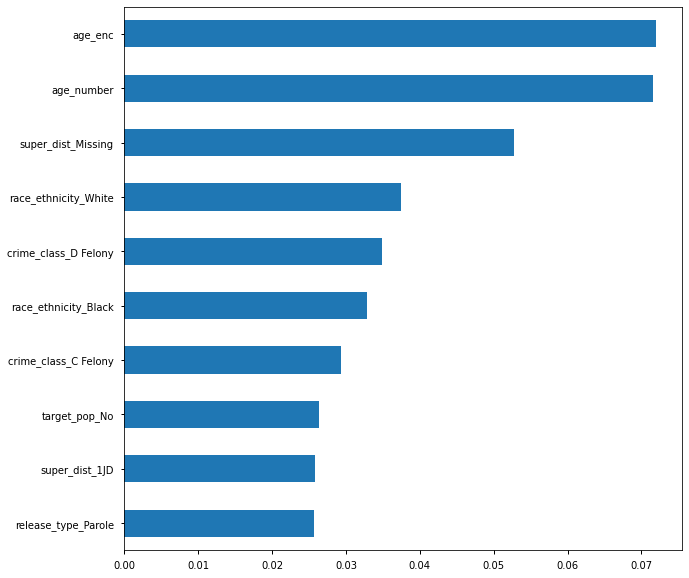

In [56]:
y_hat_test = et.predict(X_test)
evaluate_model(y_test,y_hat_test,X_test,et)

## GridSearch ExtraTrees

In [57]:
param_grid = {
    'n_estimators': [30, 100, 300],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [2, 4, 6]
}

In [58]:
# rs =RandomizedSearchCV(et, param_grid,10)
# rs.fit(X_train, y_train)

In [59]:
rs.score(X_test, y_test)

rs.best_params_

NameError: name 'rs' is not defined

In [ ]:
gs = GridSearchCV(et, param_grid, cv=5)
timer = Timer()
# timer.start()
gs.fit(X_train,y_train)
timer.stop()

In [ ]:
gs.score(X_test, y_test)

gs.best_params_

In [ ]:
et = ExtraTreesClassifier(**gs.best_params_)
et.fit(X_train,y_train)
y_hat_test = et.predict(X_test)

In [ ]:
evaluate_model(y_test,y_hat_test,X_test,et)

## XGBoost

In [ ]:
from xgboost import XGBClassifier,XGBRFClassifier

xgb_rf = XGBRFClassifier()
xgb_rf.fit(X_train, y_train)
print(xgb_rf.score(X_test,y_test))

y_hat_test = xgb_rf.predict(X_test)

evaluate_model(y_test,y_hat_test,X_test,xgb_rf)

In [ ]:
xgbrf_grid = {'colsample_bynode': 0.8, 'learning_rate': 1,
              'max_depth': 5, 'num_parallel_tree': 100, 
              'objective': 'binary:logistic', 'subsample': 0.8}

xrf_clf = XGBRFClassifier(**xgbrf_grid)

In [ ]:
xrf_clf.fit(X_train,y_train)

In [ ]:
y_hat_test = xrf_clf.predict(X_test)

evaluate_model(y_test,y_hat_test,X_test,xrf_clf)

# APPENDIX

In [ ]:
# # Create the pipeline
# pipetree = Pipeline([('enc',LabelEncoder()),
#                      ('ohe',OneHotEncoder()),
#                     ('dt',DecisionTreeClassifier())])

# # pipe = Pipeline([('scl', MinMaxScaler()),
# #                 ('pca', PCA(n_components=10)),
# #                 ('svm', svm.SVC(random_state=123))])

# # Create the grid parameter
# grid = {'dt__max_depth': [3,5,10],
#      'dt__criterion': ['gini','entropy'],
#      'dt__min_samples_split':[2,5,10],
#      'dt__min_samples_leaf':[1,2,3]}
# @timeit
# def timed_search(pipe=pipetree, grid=grid):
#     randomsearch = RandomizedSearchCV(estimator=pipe,param_distributions=grid,verbose=1)

#     randomsearch.fit(X_train, y_train)
#     return randomsearch
# # # Create the grid parameter
# # grid = [{'svm__kernel': ['poly', 'sigmoid'],
# #          'svm__C': [0.01, 1, 100],
# #          'svm__degree0': [2,3,4,5],
# #          'svm__gamma': [0.001, 0.01]}]

# # # Create the grid, with "pipe" as the estimator
# # gridsearch = GridSearchCV(estimator=pipe,
# #                   param_grid=grid,
# #                   scoring='accuracy',
# #                   cv=3)

# # Fit using grid search
# # gridsearch.fit(X_train, y_train)